In [14]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

from BinSpectra import random_noise_dataset
from BinSpectra import lowres_dataset
import warnings
from cycler import cycler
import random

PATH = '../Data/DataProducts/'

In [15]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)

def replace_flux_with_noise(phase):
    """
    Replaces the flux in the input spectrum with random Gaussian noise.
    Parameters
    ----------
    phase : integer, phase of the dataset.
    
    Returns
    -------
    dataset with flux of each spectra replaced by random Gaussian noise.
    """
    datain = loaddata(phase)
    dataset_randn = random_noise_dataset(datain)
    return dataset_randn

def run_PCA_lowres(phase, b_len, dphase=5):
    """
    Runs PCA with lower resolutions of the spectrum.
    Parameters
    ----------
    phase : integer, phase of the dataset.
    b_len : the desired bining length of the output spectrum.
    
    Returns
    -------
    Principle components
    """
    warnings.filterwarnings('ignore')
    dataset = replace_flux_with_noise(phase)
    dataset_lowres = lowres_dataset(dataset, b_len)
    snidPCA = SNePCA.SNePCA(dataset_lowres, phase - dphase, phase + dphase)
    snidPCA.snidPCA()
    snidPCA.calcPCACoeffs()
    return snidPCA


def run_PCA_fullres(phase, dphase=5):
    """
    Runs PCA with full resolutions of the spectrum.
    Parameters
    ----------
    phase : integer, phase of the dataset.
        
    Returns
    -------
    Principle components
    """
    warnings.filterwarnings('ignore')
    dataset = replace_flux_with_noise(phase)
    snidPCA = SNePCA.SNePCA(dataset, phase - dphase, phase + dphase)
    snidPCA.snidPCA()
    snidPCA.calcPCACoeffs()
    return snidPCA

## SVM scores for full resolution random noise

### Phase 0

0.14588235294117646 0.08000000000000002
0.1588235294117647 0.08086898285216189
0.15176470588235294 0.07811800141663072
0.1411764705882353 0.07156191212115554
0.14352941176470588 0.06460955396586344
0.14352941176470588 0.08164400740187047
0.15294117647058822 0.09036642056316009
0.14235294117647057 0.07449019349777286
0.14823529411764705 0.06575618170579822
0.14352941176470588 0.07638909685057847


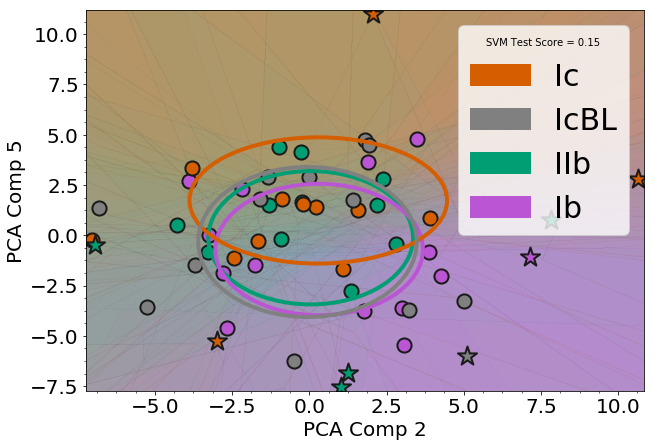

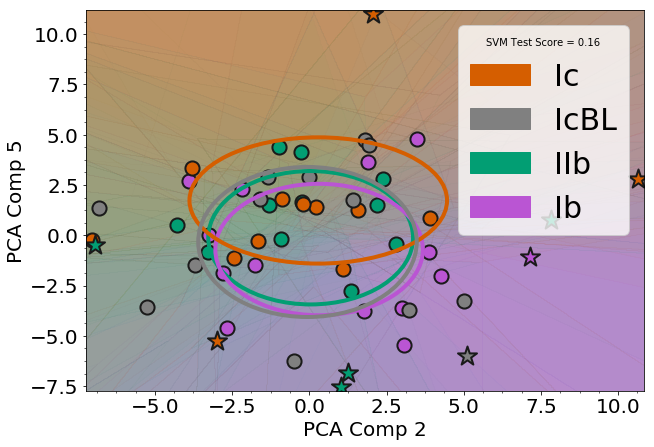

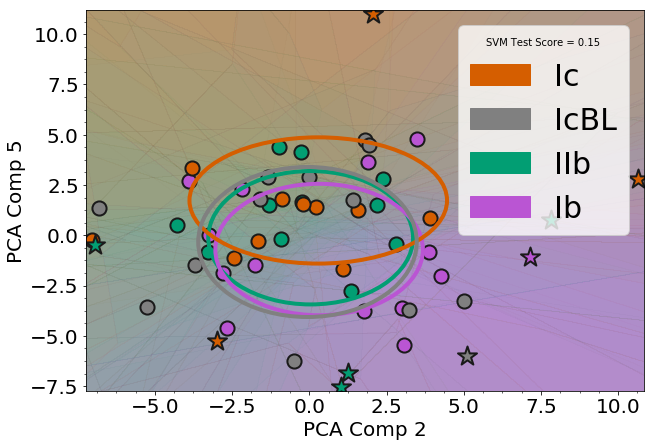

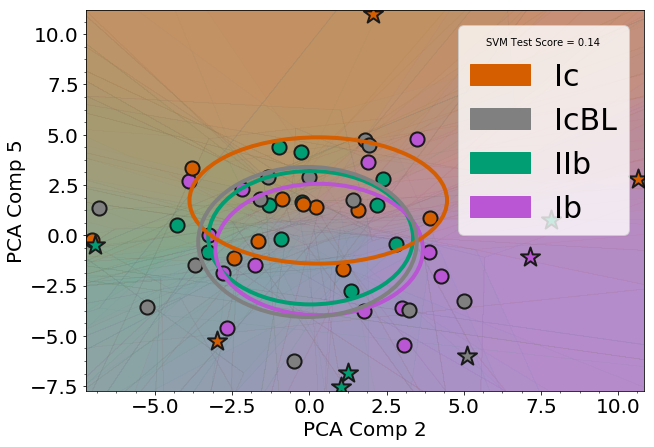

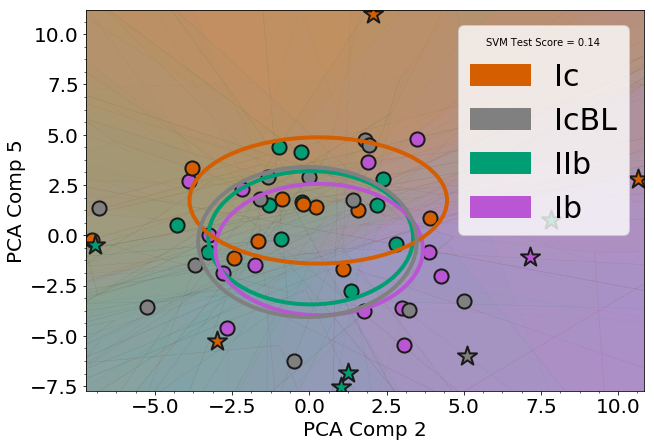

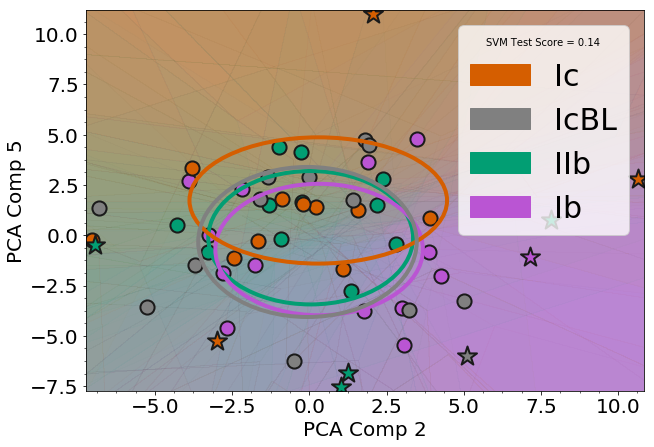

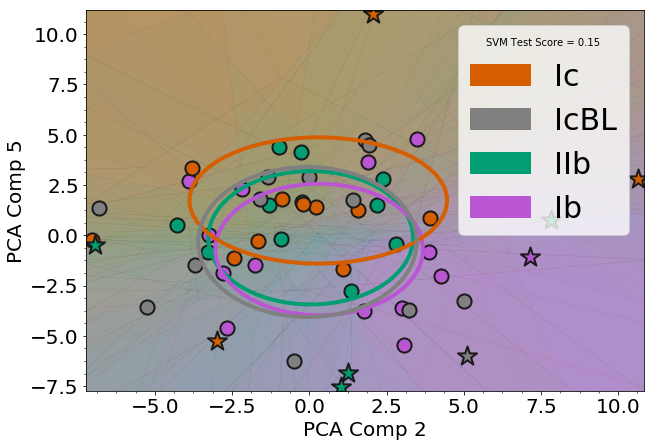

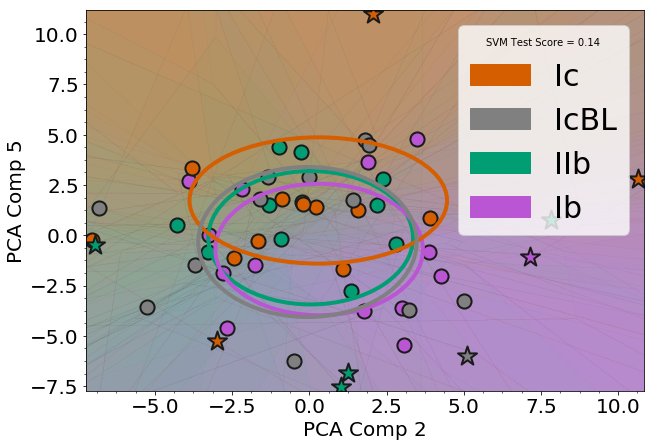

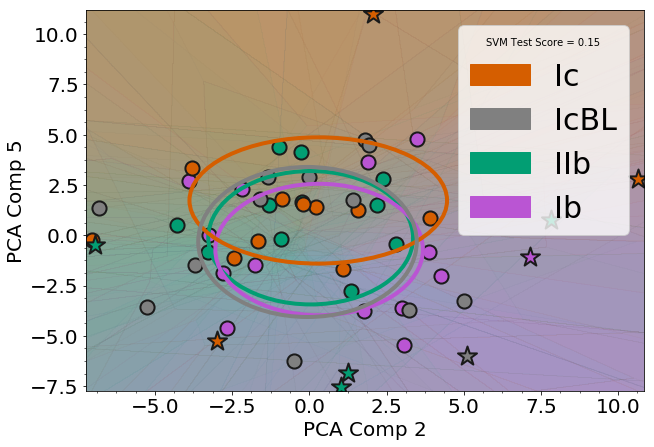

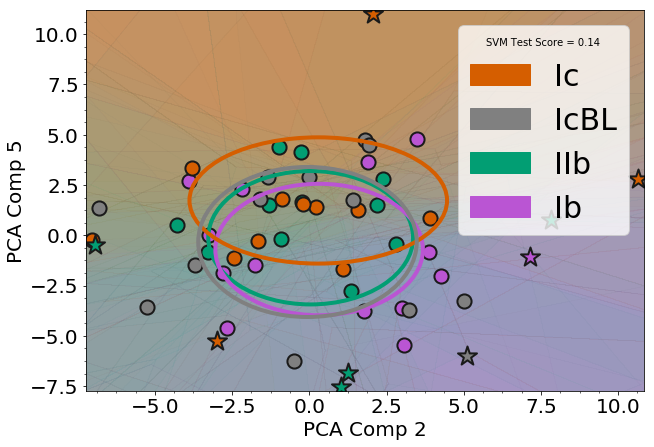

In [16]:
snidPCA = run_PCA_fullres(0, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
for i in range(10):
    f_all,svmsc, av0, std0, av0_train,std0_train=snidPCA.pcaPlot(2,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av0, std0)

### Phase 5

0.2025 0.09727538229171859
0.2125 0.0875
0.16625 0.10429075941808075
0.22 0.07097534783289196
0.185 0.08
0.21625 0.07521843191665192
0.205 0.07709571972554638
0.2 0.0739509972887452
0.19875 0.0797358921690853
0.1875 0.059947894041408996


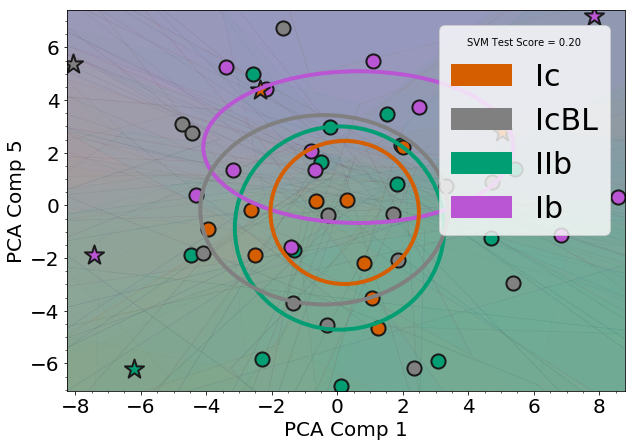

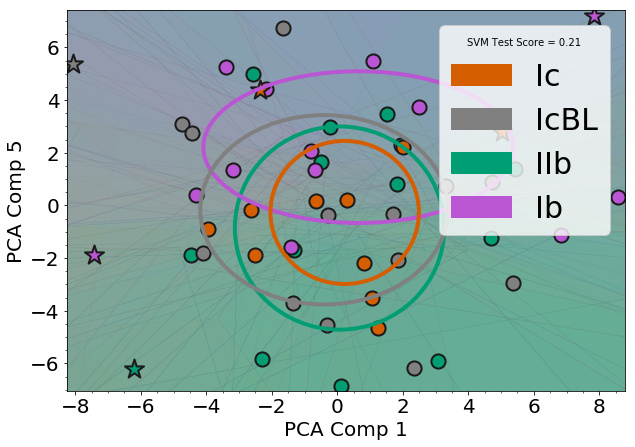

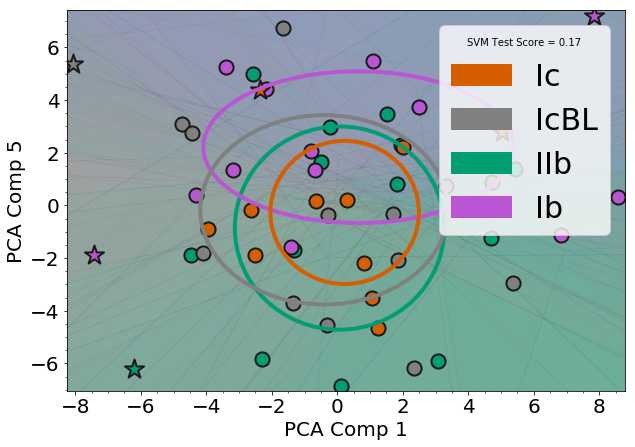

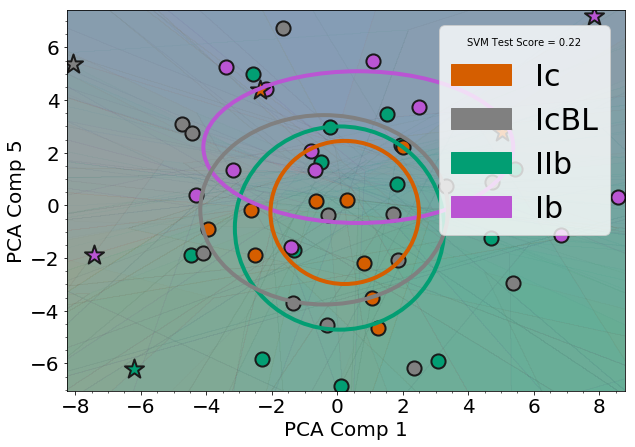

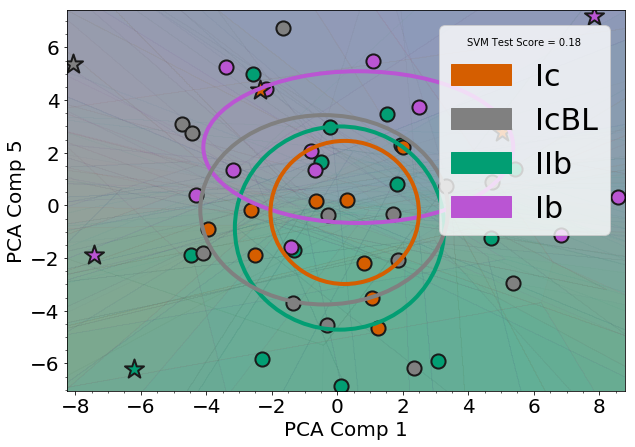

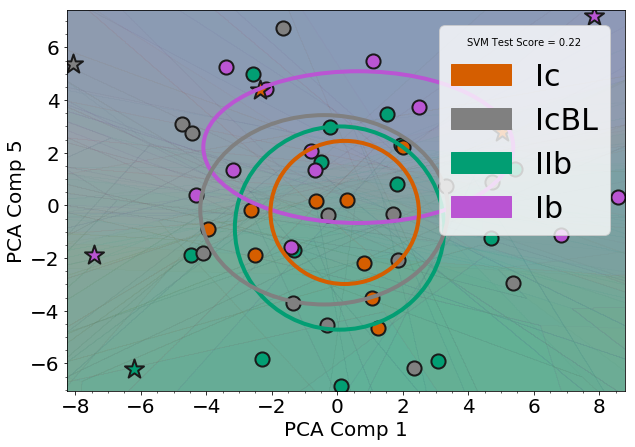

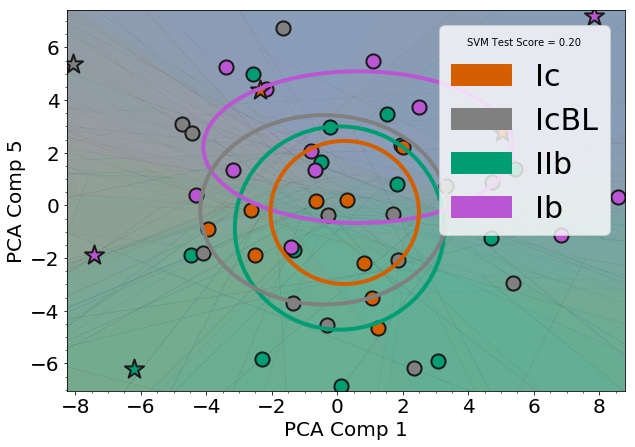

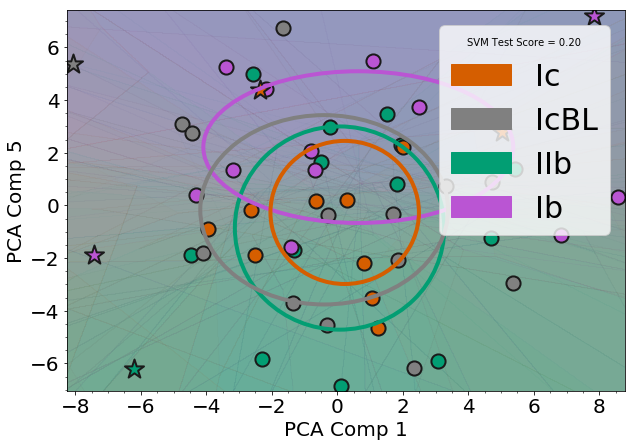

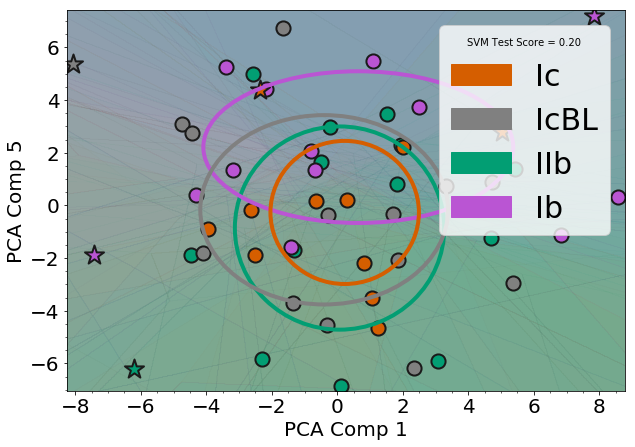

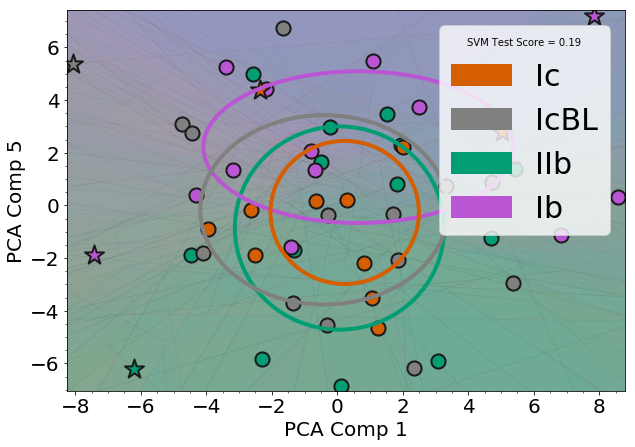

In [17]:
snidPCA = run_PCA_fullres(5, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
for i in range(10):
    f_all,svmsc, av5, std5, av5_train, std5_train=snidPCA.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av5, std5)

### Phase 10

0.2658823529411765 0.08664448300951515
0.2741176470588236 0.10297310429239499
0.27294117647058824 0.0968428970694432
0.26705882352941174 0.09128835639795925
0.28 0.09079426532505759
0.2741176470588236 0.08929559016068671
0.2847058823529412 0.10611738620027934
0.28352941176470586 0.09535219726095119
0.2858823529411765 0.09913815462485745
0.3011764705882353 0.10823529411764705


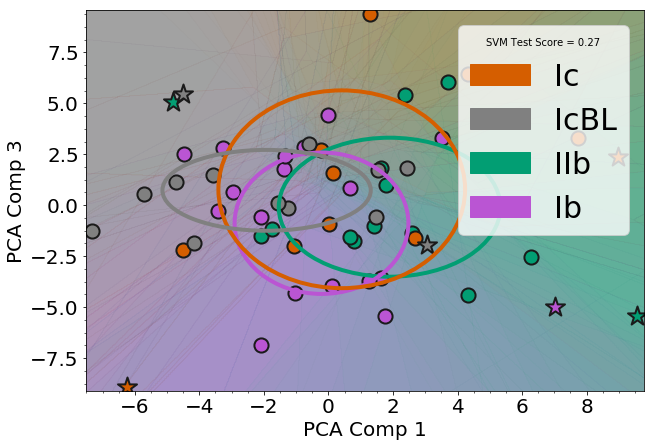

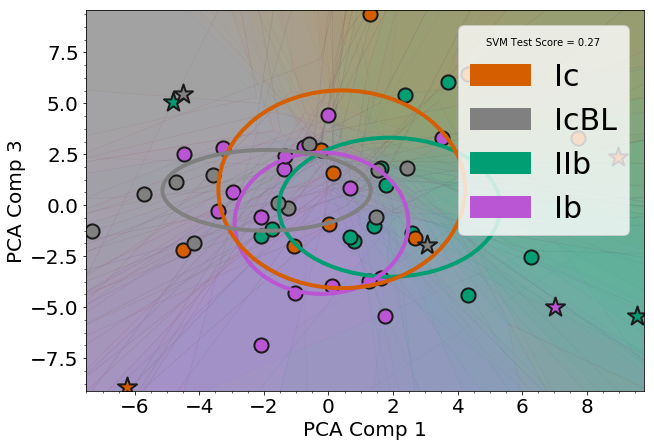

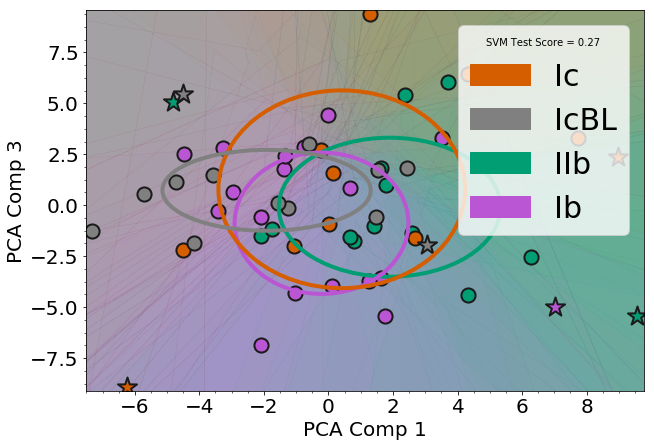

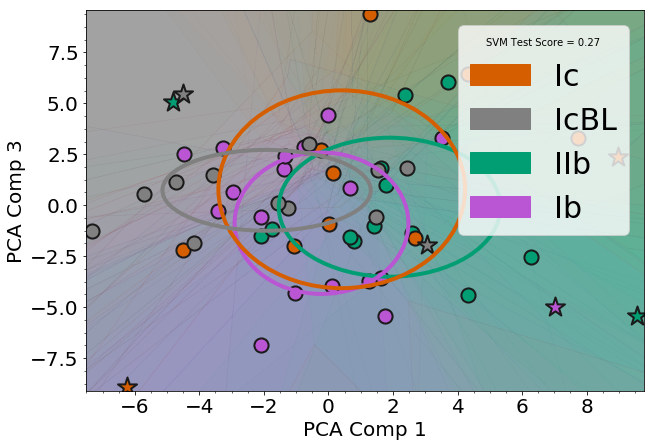

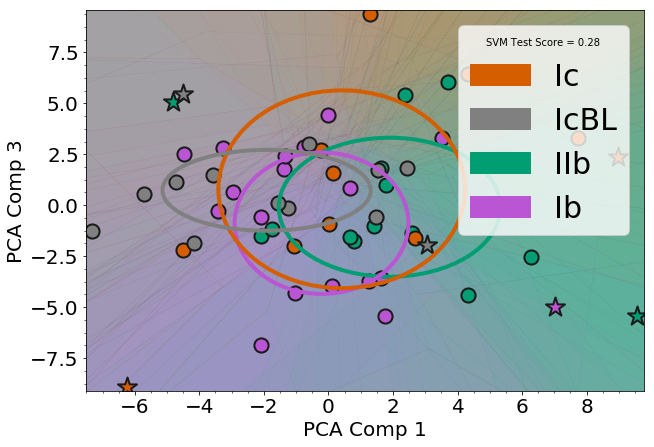

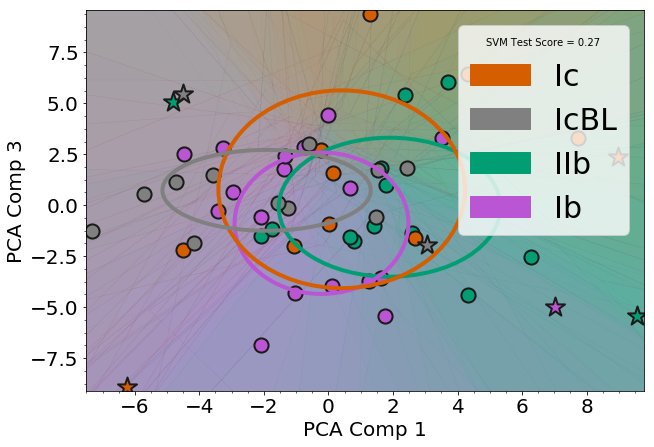

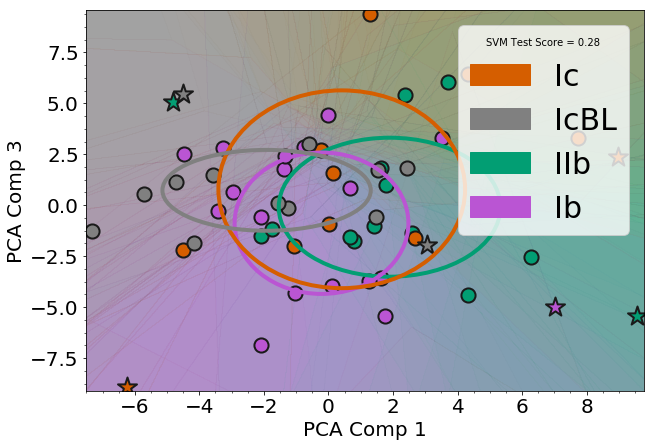

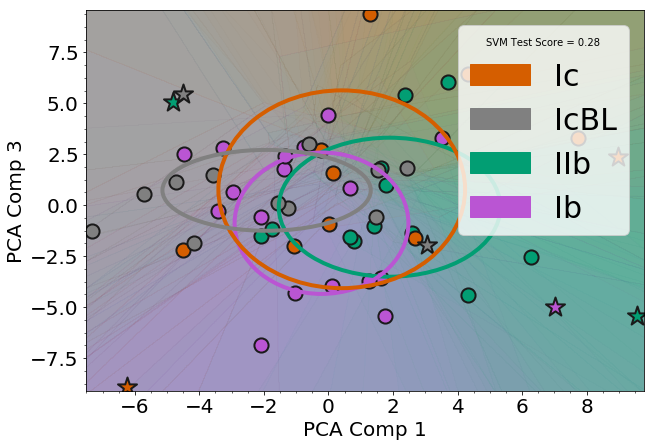

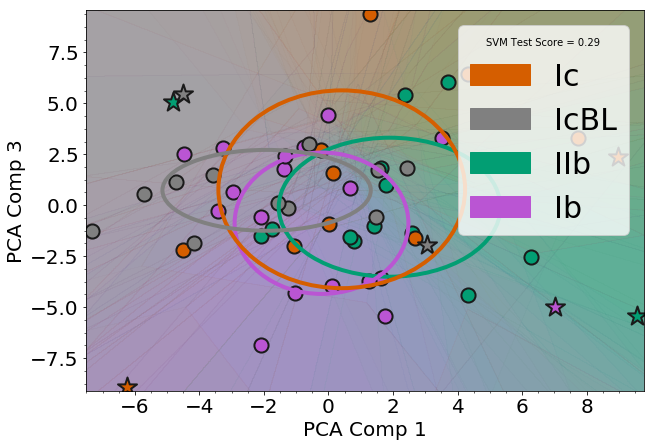

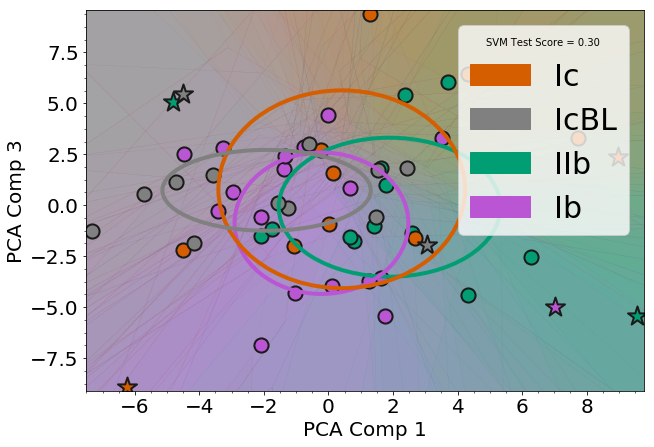

In [18]:
snidPCA = run_PCA_fullres(10, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
for i in range(10):
    f_all,svmsc, av10, std10, av10_train, std10_train=snidPCA.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av10, std10)

### Phase 15

0.23764705882352943 0.08480386489854164
0.2635294117647059 0.09055003014067699
0.27529411764705886 0.09517058078191379
0.24941176470588236 0.10624773557530011
0.2705882352941177 0.09629826790438176
0.26 0.104626539667372
0.25764705882352945 0.07882352941176471
0.24352941176470588 0.08725732536841722
0.24941176470588233 0.10493695586342475
0.24823529411764705 0.1020821299036944


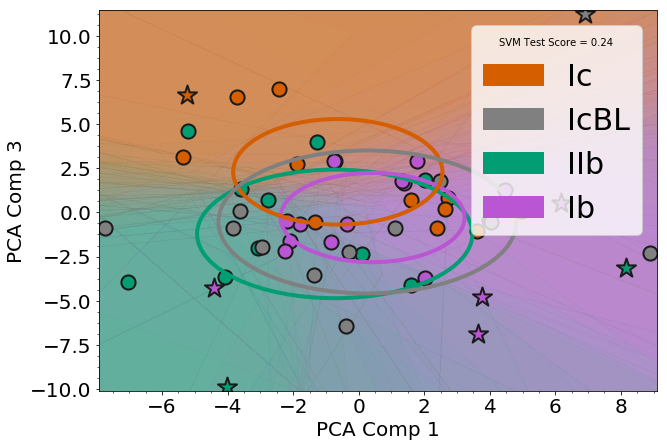

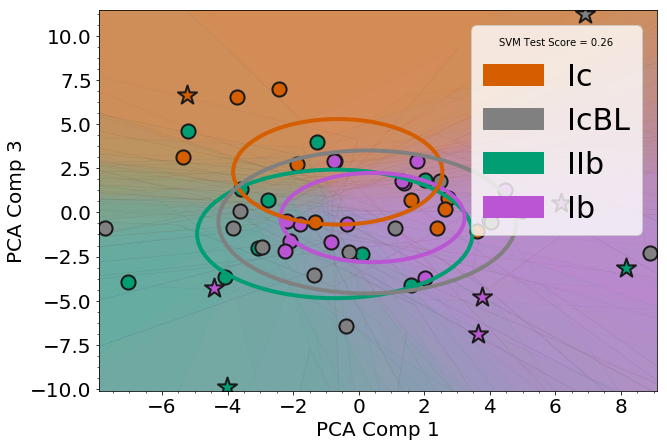

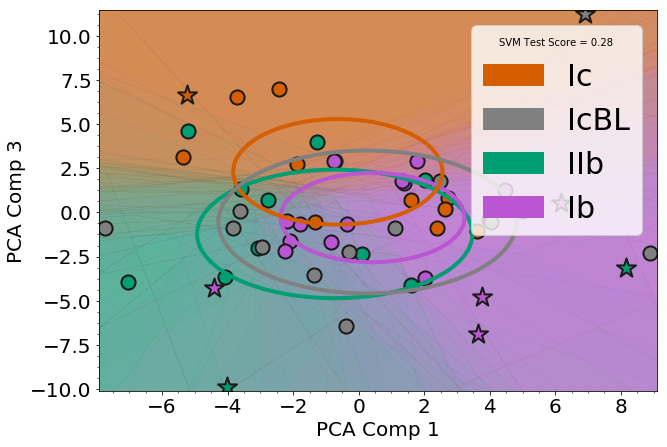

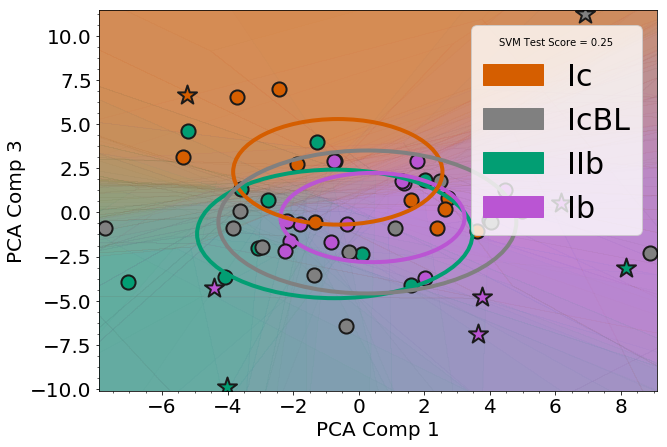

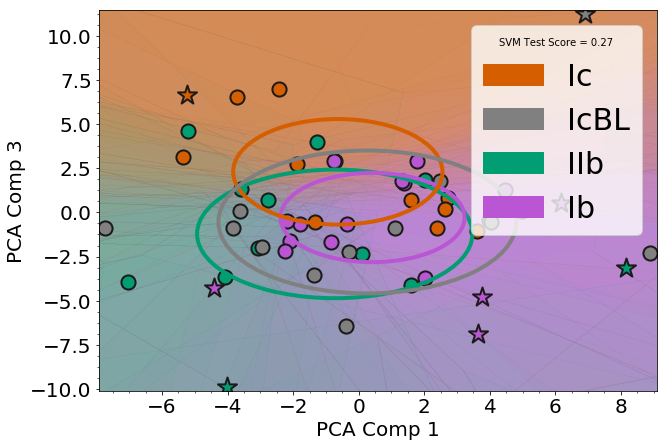

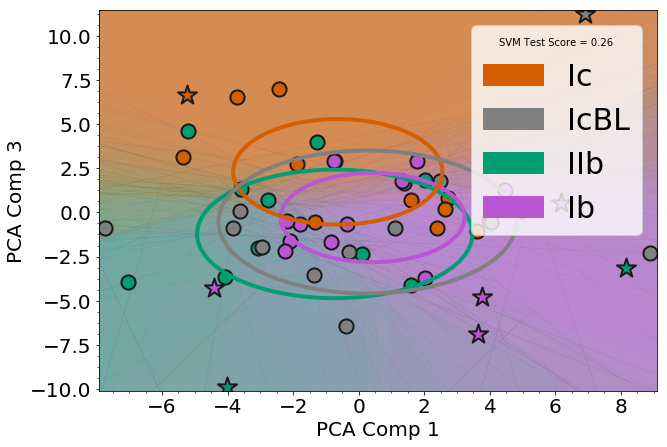

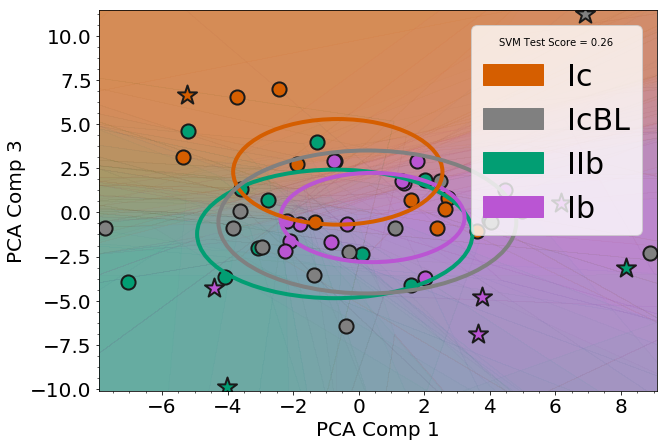

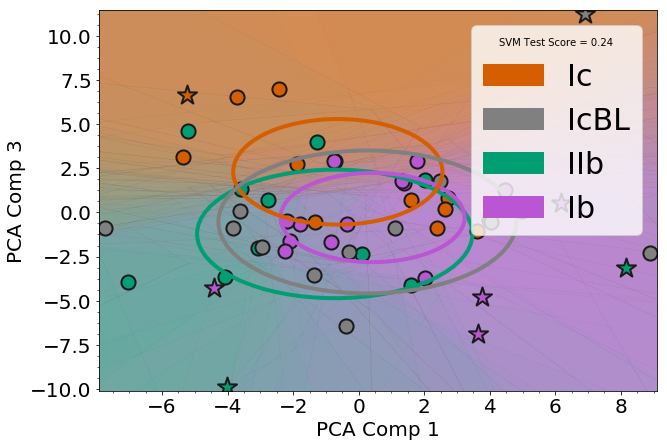

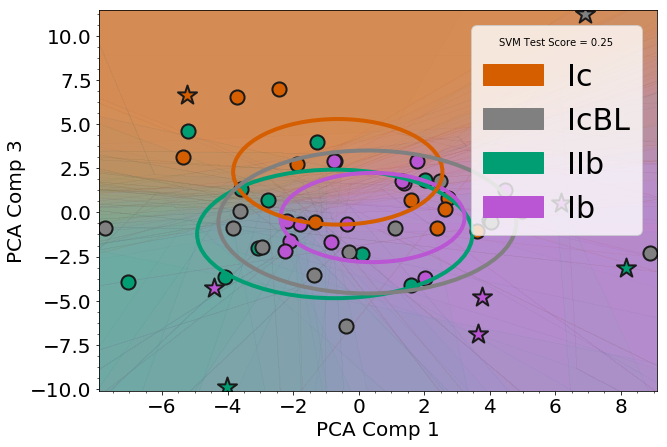

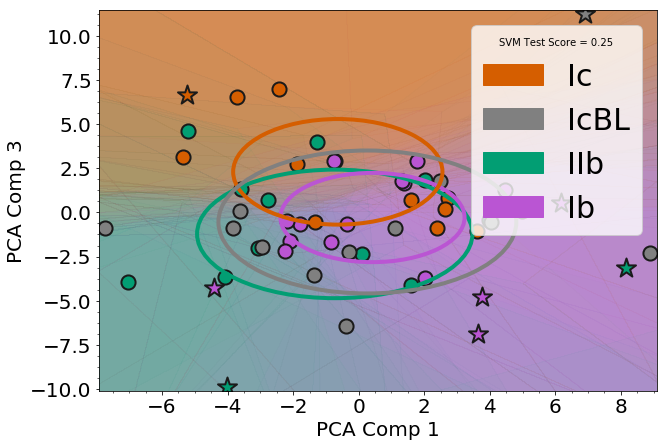

In [19]:
snidPCA = run_PCA_fullres(15, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
for i in range(10):
    f_all,svmsc, av15, std15, av15_train, std15_train=snidPCA.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av15, std15)